In [51]:
import torch
from torch import nn
from torchvision import datasets, transforms

In [54]:
trainset = datasets.MNIST(
    '~/.pytorch/MNIST_data/',
    train=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5,0.5,0.5),
            (0.5,0.5,0.5)
        )
    ])
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)

In [57]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 5


In [60]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:        
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    else:
        print(running_loss/len(trainloader))
        
        

1.0357825997859431
0.389681344696962
0.32849921470384863
0.29584029254152067
0.26935927252938496


In [61]:
import sys
sys.path.insert(0, '/Users/mondormo/stackla17/deeplearning2019/deep-learning-v2-pytorch/intro-to-pytorch')

In [62]:
%matplotlib inline
import helper

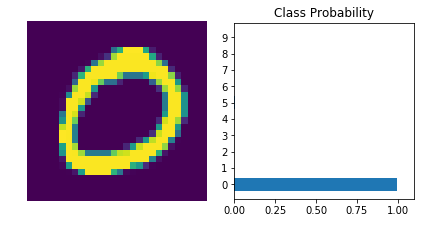

In [63]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

